# Project: Covid-19 cases & Venues Data Analysis of Stockholm

*by: Sabrina El Mouhib*

## 1. Download Necessary Libraries 

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from bs4 import BeautifulSoup
from IPython.display import display_html

## 2. Read Data from Excel File

Source of the number of cases up till the 31 week 2020 : https://www.sll.se/verksamhet/halsa-och-vard/nyheter-halsa-och-vard/2020/06/ny-rapportering-av-antal-smittade-med-covid-19-per-kommun-och-stadsdel/  

Source of the coordinates : https://geohack.toolforge.org

In [2]:
Dataframe=pd.read_csv('https://raw.githubusercontent.com/sabrina-elmouhib/Coursera_Capstone/master/Data%20Capstone%20Covid19-Stockholm.csv')
Dataframe

,Districts,Confirmed Cases Per 10.000,Latitude,Longitude,Total Confirmed Cases
0,Alvsjo,110,59.277860,18.008880,347
1,Bromma,93,59.338889,17.938889,753
2,Enskede-Arsta-Vantor,115,59.281755,18.051066,1183
3,Farsta,115,59.240278,18.097222,687
4,Hagersten-Liljeholmen,93,59.303268,18.005921,857
5,Hasselby-Vallingby,97,59.379777,17.830623,739
6,Kungsholmen,103,59.333016,18.033094,734
7,Norrmalm,110,59.336997,18.056697,806
8,Ostermalm,90,59.336701,18.088621,708
9,Rinkeby-Kista,142,59.405409,17.945848,726


In [3]:
Dataframe.rename(columns = {'Covid - 19 Cases ':'Total Confirmed Cases of Covid-19', 'Confirmed Cases pf Covid-19 Per 10.000':'Confirmed Cases of Covid-19 per 10.000'},inplace=True)
Dataframe


,Districts,Confirmed Cases Per 10.000,Latitude,Longitude,Total Confirmed Cases
0,Alvsjo,110,59.277860,18.008880,347
1,Bromma,93,59.338889,17.938889,753
2,Enskede-Arsta-Vantor,115,59.281755,18.051066,1183
3,Farsta,115,59.240278,18.097222,687
4,Hagersten-Liljeholmen,93,59.303268,18.005921,857
5,Hasselby-Vallingby,97,59.379777,17.830623,739
6,Kungsholmen,103,59.333016,18.033094,734
7,Norrmalm,110,59.336997,18.056697,806
8,Ostermalm,90,59.336701,18.088621,708
9,Rinkeby-Kista,142,59.405409,17.945848,726


In [4]:
Dataframe_10000= Dataframe.drop(['Total Confirmed Cases','Longitude','Latitude '], axis=1)

In [5]:
Dataframe_Total= Dataframe.drop(['Confirmed Cases Per 10.000','Latitude ','Longitude'], axis=1)
Dataframe_Total

,Districts,Total Confirmed Cases
0,Alvsjo,347
1,Bromma,753
2,Enskede-Arsta-Vantor,1183
3,Farsta,687
4,Hagersten-Liljeholmen,857
5,Hasselby-Vallingby,739
6,Kungsholmen,734
7,Norrmalm,806
8,Ostermalm,708
9,Rinkeby-Kista,726


In [6]:
Dataframe_Stockholm_District= Dataframe.drop(['Total Confirmed Cases','Confirmed Cases Per 10.000'], axis=1)
Dataframe_Stockholm_District.columns

Index(['Districts ', 'Latitude ', 'Longitude'], dtype='object')

### Create a Map of Stockholm

In [7]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
print('folium installed')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

In [8]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import matplotlib.cm as cm
import matplotlib.colors as colors

# Geograpical coordinate of Stockholm needed to visualize the neighbehoods in Toronto's map 
address = 'Stockholm, Sweden'

geolocator = Nominatim(user_agent="Stockholm")
location = geolocator.geocode(address)
latitude_stockholm = location.latitude
longitude_stockholm= location.longitude
print('The geograpical coordinate of Stockholm are {}, {}.'.format(latitude_stockholm, longitude_stockholm))


# create map of Stockholm using latitude and longitude values
map_stockholm_dis = folium.Map(location=[latitude_stockholm,longitude_stockholm], zoom_start=10)
map_stockholm_dis

# add districts as markers to map
for lat, lng,district in zip(Dataframe_Stockholm_District['Latitude '], Dataframe_Stockholm_District['Longitude'],Dataframe_Stockholm_District['Districts ']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stockholm_dis)  
    
map_stockholm_dis

The geograpical coordinate of Stockholm are 59.3251172, 18.0710935.


### Map for regions with the highest confirmed cases of covid 19 per  10.000

In [9]:
sf_geo = r'https://raw.githubusercontent.com/sabrina-elmouhib/Coursera_Capstone/master/StockholmDistrict.geojson' # geojson file

# create a plain San Francisco map

map_stockholm_dis.choropleth(
    geo_data=sf_geo,
    data=Dataframe_10000,
    columns=['Districts ','Confirmed Cases Per 10.000'],
    key_on='feature.properties.Disrtricts ',
    fill_color='YlOrRd', 
    fill_opacity=0.3, 
    line_opacity=0.2,
    legend_name='Confirmed cases of Covid_19 per 10.000'
)

# display map
map_stockholm_dis

### Map to visiulize districts with the highest number of covid-19 cases

In [10]:
sf_geo = r'https://raw.githubusercontent.com/sabrina-elmouhib/Coursera_Capstone/master/StockholmDistrict.geojson' # geojson file

# create a plain San Francisco map
map_stockholmD2 = folium.Map(location=[latitude_stockholm,longitude_stockholm], zoom_start=10)
map_stockholmD2.choropleth(
    geo_data=sf_geo,
    data=Dataframe_Total,
    columns=['Districts ','Total Confirmed Cases'],
    key_on='feature.properties.Disrtricts ',
    fill_color='YlOrRd', 
    fill_opacity=0.3, 
    line_opacity=0.2,
    legend_name='Total Confirmed Cases'
)

# add districts as markers to map
for lat, lng,district in zip(Dataframe_Stockholm_District['Latitude '], Dataframe_Stockholm_District['Longitude'],Dataframe_Stockholm_District['Districts ']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stockholmD2)
# display map
map_stockholmD2

### Define Foursquare Credentials and Version 

In [11]:
CLIENT_ID = 'LDIXCYBEHXBNR40NWL5EOZ5S35JYOFBKVSQIJWGVFGRCJMIQ' # your Foursquare ID
CLIENT_SECRET = 'ZD4XIGCR2EH14XVW0I4ZQ5QVXTSSRV4RHNHNYZCKJETUTUZH' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LDIXCYBEHXBNR40NWL5EOZ5S35JYOFBKVSQIJWGVFGRCJMIQ
CLIENT_SECRET:ZD4XIGCR2EH14XVW0I4ZQ5QVXTSSRV4RHNHNYZCKJETUTUZH


### Now let's find the top 50 venues of Sodermalm with a radius of 1km using Foursquare

In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
search_query = 'Cafe' # search query

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, 59.312879,  18.069671,  VERSION, search_query, radius, LIMIT) 
url # display URL

'https://api.foursquare.com/v2/venues/search?client_id=LDIXCYBEHXBNR40NWL5EOZ5S35JYOFBKVSQIJWGVFGRCJMIQ&client_secret=ZD4XIGCR2EH14XVW0I4ZQ5QVXTSSRV4RHNHNYZCKJETUTUZH&ll=59.312879,18.069671&v=20180604&query=Cafe&radius=1000&limit=100'

In [13]:
import requests
#Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f37bd61407e0717626f766f'},
 'response': {'venues': [{'id': '4adcdaecf964a5202e5a21e3',
    'name': 'Café Fåtöljen',
    'location': {'address': 'Götgatan 12',
     'lat': 59.319458096246244,
     'lng': 18.070763051846352,
     'labeledLatLngs': [{'label': 'display',
       'lat': 59.319458096246244,
       'lng': 18.070763051846352}],
     'distance': 735,
     'postalCode': '118 46',
     'cc': 'SE',
     'city': 'Stockholm',
     'state': 'Storstockholm',
     'country': 'Sverige',
     'formattedAddress': ['Götgatan 12', '118 46 Stockholm', 'Sverige']},
    'categories': [{'id': '4bf58dd8d48988d16d941735',
      'name': 'Café',
      'pluralName': 'Cafés',
      'shortName': 'Café',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1597488479',
    'hasPerk': False},
   {'id': '4e109b211f6e671dd9e00e72',
    'name': 'Fotografiskas café',
    'loc

### Get relevant part of JSON and transform it into a pandas dataframe

In [14]:
#Let's borrow the function from the foursquare lab 

from pandas.io.json import json_normalize #tranform JSON file into a pandas dataframe 

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe_sodermalm_cafe= dataframe[['name','location.address','location.lat','location.lng']]
dataframe_sodermalm_cafe.head()


,name,location.address,location.lat,location.lng
0,Café Fåtöljen,Götgatan 12,59.319458,18.070763
1,Fotografiskas café,Stadsgårdshamnen 22,59.317833,18.085083
2,Café Giffi,Hornsgatan 65,59.317760,18.053586
3,Ljunggrens Café,NaN,59.316959,18.071578
4,K9 Café,Wollmar Yxkullsgatan 3,59.316932,18.064605


In [15]:
print('{} cafe were returned by Foursquare in Sodermalm'.format(dataframe_sodermalm_cafe.shape[0]))

50 cafe were returned by Foursquare in Sodermalm


### Now let's repeat the same process for all districts

In [16]:
for district , latitude, longitude in zip (Dataframe['Districts '],Dataframe['Latitude '],Dataframe['Longitude']):

    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, latitude,  longitude,  VERSION, search_query, radius, LIMIT) 
    #Send the GET request and examine the resutls
    results = requests.get(url).json() 
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    dataframe_d_cafe= dataframe[['name','location.address','location.lat','location.lng']]
    print('============',district,'============')
    #print('The cafe are : \n {}'.format(dataframe_d_cafe))
    print('{} cafe were returned by Foursquare'.format(dataframe_d_cafe.shape[0]),'in the district',district)
    print(' \n')
    

============ Alvsjo ============
1 cafe were returned by Foursquare in the district Alvsjo
 

============ Bromma ============
7 cafe were returned by Foursquare in the district Bromma
 

============ Enskede-Arsta-Vantor ============
3 cafe were returned by Foursquare in the district Enskede-Arsta-Vantor
 

============ Farsta ============
9 cafe were returned by Foursquare in the district Farsta
 

============ Hagersten-Liljeholmen ============
17 cafe were returned by Foursquare in the district Hagersten-Liljeholmen
 

============ Hasselby-Vallingby ============
2 cafe were returned by Foursquare in the district Hasselby-Vallingby
 

============ Kungsholmen ============
50 cafe were returned by Foursquare in the district Kungsholmen
 

============ Norrmalm ============
50 cafe were returned by Foursquare in the district Norrmalm
 

============ Ostermalm ============
50 cafe were returned by Foursquare in the district Ostermalm
 

============ Rinkeby-Kista ============
28 cafe 

In [17]:
data=[["Alvsjo" , 5],["Bromma",7],["Enskede-Arsta-Vantor",3],['Farsta',9 ],["Hagersten-Liljeholmen",17],["Hasselby-Vallingby",2],
      ["Kungsholmen",50],["Norrmalm",50],["Ostermalm",50],["Rinkeby-Kista",28],["Skarholmen",5],["Skarpnack",8],["Sodermalm",50],["Spanga-Tensta",2]]
Dataframe_f = pd.DataFrame(data, columns=['Districts ','Total Number of Cafe'])
Dataframe_f

,Districts,Total Number of Cafe
0,Alvsjo,5
1,Bromma,7
2,Enskede-Arsta-Vantor,3
3,Farsta,9
4,Hagersten-Liljeholmen,17
5,Hasselby-Vallingby,2
6,Kungsholmen,50
7,Norrmalm,50
8,Ostermalm,50
9,Rinkeby-Kista,28


In [18]:
Data_final= Dataframe_f.merge(Dataframe)
Data_final

,Districts,Total Number of Cafe,Confirmed Cases Per 10.000,Latitude,Longitude,Total Confirmed Cases
0,Alvsjo,5,110,59.277860,18.008880,347
1,Bromma,7,93,59.338889,17.938889,753
2,Enskede-Arsta-Vantor,3,115,59.281755,18.051066,1183
3,Farsta,9,115,59.240278,18.097222,687
4,Hagersten-Liljeholmen,17,93,59.303268,18.005921,857
5,Hasselby-Vallingby,2,97,59.379777,17.830623,739
6,Kungsholmen,50,103,59.333016,18.033094,734
7,Norrmalm,50,110,59.336997,18.056697,806
8,Ostermalm,50,90,59.336701,18.088621,708
9,Rinkeby-Kista,28,142,59.405409,17.945848,726


### Data Analysis of the Final Dataframe

In [19]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis of Correlation Between Total Number of Cafe and Confirmed Cases of Covid-19 Per 10.000

(0, 54.292082330400795)

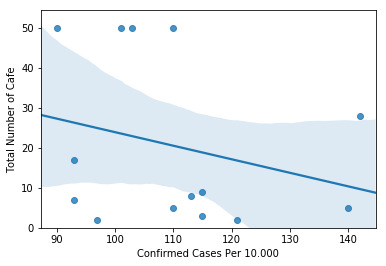

In [20]:
sns.regplot(x="Confirmed Cases Per 10.000", y="Total Number of Cafe", data=Data_final)
plt.ylim(0,)


In [21]:
Data_final[["Total Number of Cafe", "Confirmed Cases Per 10.000"]].corr()

,Total Number of Cafe,Confirmed Cases Per 10.000
Total Number of Cafe,1.000000,-0.265357
Confirmed Cases Per 10.000,-0.265357,1.000000


In [22]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(Data_final["Total Number of Cafe"], Data_final["Confirmed Cases Per 10.000"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is -0.26535716209863547  with a P-value of P =  0.35919654319129873


(0, 88.39258205363474)

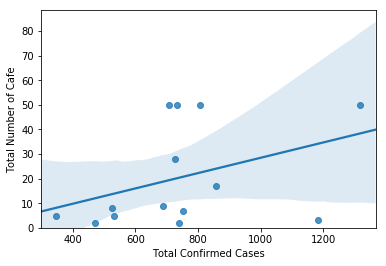

In [23]:
sns.regplot(x="Total Confirmed Cases", y="Total Number of Cafe", data=Data_final)
plt.ylim(0,)

In [24]:
Data_final[["Total Number of Cafe", "Total Confirmed Cases"]].corr()

,Total Number of Cafe,Total Confirmed Cases
Total Number of Cafe,1.000000,0.391628
Total Confirmed Cases,0.391628,1.000000


In [25]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(Data_final["Total Number of Cafe"], Data_final["Total Confirmed Cases"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.39162828705926034  with a P-value of P =  0.16611689213047273


### Grouping using K-means

In [27]:
Df=Data_final[["Districts ","Total Number of Cafe", "Total Confirmed Cases", "Confirmed Cases Per 10.000","Latitude ","Longitude"]]
Df

,Districts,Total Number of Cafe,Total Confirmed Cases,Confirmed Cases Per 10.000,Latitude,Longitude
0,Alvsjo,5,347,110,59.277860,18.008880
1,Bromma,7,753,93,59.338889,17.938889
2,Enskede-Arsta-Vantor,3,1183,115,59.281755,18.051066
3,Farsta,9,687,115,59.240278,18.097222
4,Hagersten-Liljeholmen,17,857,93,59.303268,18.005921
5,Hasselby-Vallingby,2,739,97,59.379777,17.830623
6,Kungsholmen,50,734,103,59.333016,18.033094
7,Norrmalm,50,806,110,59.336997,18.056697
8,Ostermalm,50,708,90,59.336701,18.088621
9,Rinkeby-Kista,28,726,142,59.405409,17.945848


Text(0.5, 0, 'Confirmed Cases Per 10.000 of Covid-19')

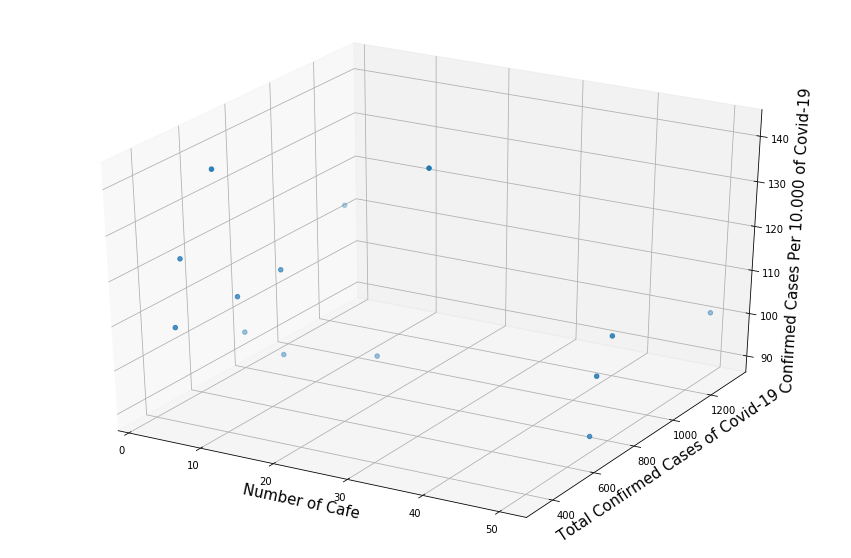

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig= plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection='3d')
x= Data_final["Total Number of Cafe"]
y= Data_final["Total Confirmed Cases"]
z= Data_final["Confirmed Cases Per 10.000"]

ax.scatter(x,y,z,marker='o')

ax.set_xlabel("Number of Cafe",fontsize= 15)
ax.set_ylabel("Total Confirmed Cases of Covid-19",fontsize= 15)
ax.set_zlabel("Confirmed Cases Per 10.000 of Covid-19",fontsize= 15)



In [29]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

# number of cluster chosen is 2
k=3
clustering = Df.drop(['Districts ','Latitude ' ,'Longitude'],1)

# run k-means clustering
kmeans = KMeans(n_clusters = k,random_state=0).fit(clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_


array([2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2], dtype=int32)

In [30]:
# insert the cluster labels to the data frame
Df.insert(0,'Label Cluster',kmeans.labels_)
Df

,Label Cluster,Districts,Total Number of Cafe,Total Confirmed Cases,Confirmed Cases Per 10.000,Latitude,Longitude
0,2,Alvsjo,5,347,110,59.277860,18.008880
1,1,Bromma,7,753,93,59.338889,17.938889
2,0,Enskede-Arsta-Vantor,3,1183,115,59.281755,18.051066
3,1,Farsta,9,687,115,59.240278,18.097222
4,1,Hagersten-Liljeholmen,17,857,93,59.303268,18.005921
5,1,Hasselby-Vallingby,2,739,97,59.379777,17.830623
6,1,Kungsholmen,50,734,103,59.333016,18.033094
7,1,Norrmalm,50,806,110,59.336997,18.056697
8,1,Ostermalm,50,708,90,59.336701,18.088621
9,1,Rinkeby-Kista,28,726,142,59.405409,17.945848


### Understanding the Clusters

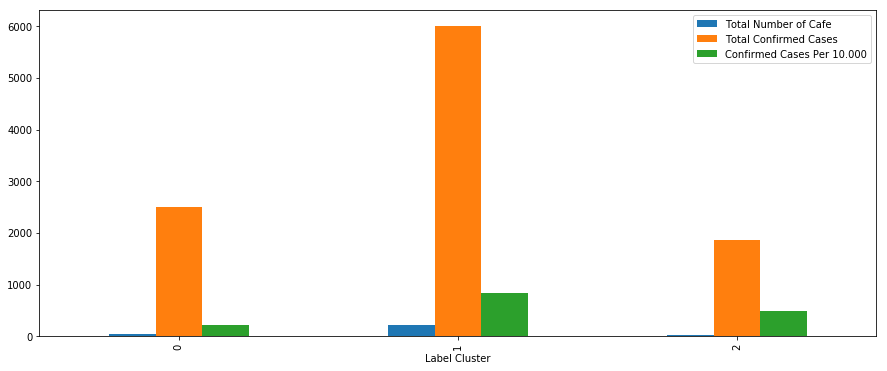

In [84]:
#plot the bar chart
Df1 = Df[['Label Cluster','Total Number of Cafe','Total Confirmed Cases','Confirmed Cases Per 10.000']]
Df1.set_index('Label Cluster',inplace=True)
Df1.groupby('Label Cluster').sum().plot(kind='bar',figsize=(15,6))
plt.show()

From the graph, we can label the cluster as follow: 
1.	Cluster 0 = Medium number of Café shops  
2.	Cluster 1 = High number of Café Shops 
3.	Cluster 3 = Low number of Café Shops 

### Ploting Stockholm Maps with Clusters

In [31]:
sf_geo = r'https://raw.githubusercontent.com/sabrina-elmouhib/Coursera_Capstone/master/StockholmDistrict.geojson' # geojson file

# create a plain Stockholm map
map_stockholmD3 = folium.Map(location=[latitude_stockholm,longitude_stockholm], zoom_start=10)
map_stockholmD3.choropleth(
    geo_data=sf_geo,
    data=Df,
    columns=['Districts ','Confirmed Cases Per 10.000'],
    key_on='feature.properties.Disrtricts ',
    fill_color='YlOrRd', 
    fill_opacity=0.3, 
    line_opacity=0.2,
    legend_name='Confirmed Cases Per 10.000 of Covid-19'
)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add districts as markers to map
markers_colors = []
for lat, lng,district,cluster in zip(Df['Latitude '], Df['Longitude'],Df['Districts '],Df['Label Cluster']):
    label = '{}'.format(district)
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_stockholmD3)
    
       
# display map
map_stockholmD3

In [32]:
sf_geo = r'https://raw.githubusercontent.com/sabrina-elmouhib/Coursera_Capstone/master/StockholmDistrict.geojson' # geojson file

# create a plain Stockholm map
map_stockholmD2 = folium.Map(location=[latitude_stockholm,longitude_stockholm], zoom_start=10)
map_stockholmD2.choropleth(
    geo_data=sf_geo,
    data=Df,
    columns=['Districts ','Total Confirmed Cases'],
    key_on='feature.properties.Disrtricts ',
    fill_color='YlOrRd', 
    fill_opacity=0.3, 
    line_opacity=0.2,
    legend_name='Total Confirmed Cases of Covid-19'
)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add districts as markers to map
markers_colors = []
for lat, lng,district,cluster in zip(Df['Latitude '], Df['Longitude'],Df['Districts '],Df['Label Cluster']):
    label = '{}'.format(district)
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_stockholmD2)
    
       
# display map
map_stockholmD2